In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def read_results(results_dir, dataset='val'):
    
    # read arrays
    preds = np.load(os.path.join(results_dir,  f'{dataset}_predictions.npy'))
    obs = np.load(os.path.join(results_dir,  f'{dataset}_targets.npy'))
    
    # reshape arrays
    preds = preds.squeeze().transpose(1, 0, 2)
    obs = obs.squeeze().transpose(1, 0, 2)

    return preds, obs

In [89]:
# High-res
gino_vl_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing/gino_predictions_20260117_120324'
gino_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing_standard_loss/gino_predictions_20260117_115735'
fno_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO_predictions/forcing/fno_predictions_20260117_130905'

# # Low-res
# gino_vl_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing/gino_predictions_20260117_131833'
# gino_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing_standard_loss/gino_predictions_20260117_131908'
# fno_dir = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO_predictions/forcing/fno_predictions_20260117_134440'

In [90]:
def compute_mae(preds, obs):
    mae = []
    for idx in range(obs.shape[-1]):
        mae.append(np.mean(np.abs(preds[...,idx] - obs[...,idx]), axis=-1)/obs[...,idx].std(axis=(0, 1)))
    return np.array(mae)


def compute_var(y):
    var = []
    for idx in range(y.shape[-1]):
        var.append(np.var(y[...,idx], axis=-1))
    return tuple(var)

In [91]:
dataset = 'train'
gino_vl_preds, gino_vl_obs = read_results(gino_vl_dir, dataset)
gino_preds, gino_obs = read_results(gino_dir, dataset)
fno_preds, fno_obs = read_results(fno_dir, dataset)

fno_mae = compute_mae(fno_preds, fno_obs)
gino_mae = compute_mae(gino_preds, gino_obs)
gino_vl_mae = compute_mae(gino_vl_preds, gino_vl_obs)

print(fno_mae.shape, gino_mae.shape, gino_vl_mae.shape)

(2, 61360) (2, 61360) (2, 61360)


In [92]:
print(dataset)
print('FNO', fno_mae.mean(1), fno_mae.std(1))
print('GINO', gino_mae.mean(1), gino_mae.std(1))
print('GINO-VL', gino_vl_mae.mean(1), gino_vl_mae.std(1))

train
FNO [0.11818599 0.18984126] [0.16015721 0.22101525]
GINO [0.1012455  0.16074284] [0.15636548 0.17993287]
GINO-VL [0.10018562 0.1653363 ] [0.16439141 0.19084599]


In [93]:
dataset = 'val'

gino_vl_preds, gino_vl_obs = read_results(gino_vl_dir, dataset)
gino_preds, gino_obs = read_results(gino_dir, dataset)
fno_preds, fno_obs = read_results(fno_dir, dataset)

fno_mae = compute_mae(fno_preds, fno_obs)
gino_mae = compute_mae(gino_preds, gino_obs)
gino_vl_mae = compute_mae(gino_vl_preds, gino_vl_obs)

In [94]:
print(dataset)
print('FNO', fno_mae.mean(1), fno_mae.std(1))
print('GINO', gino_mae.mean(1), gino_mae.std(1))
print('GINO-VL', gino_vl_mae.mean(1), gino_vl_mae.std(1))

val
FNO [0.12845713 0.21220828] [0.17327567 0.23468093]
GINO [0.10577317 0.18174882] [0.1680087  0.19528393]
GINO-VL [0.10613395 0.18511674] [0.17696102 0.20420191]


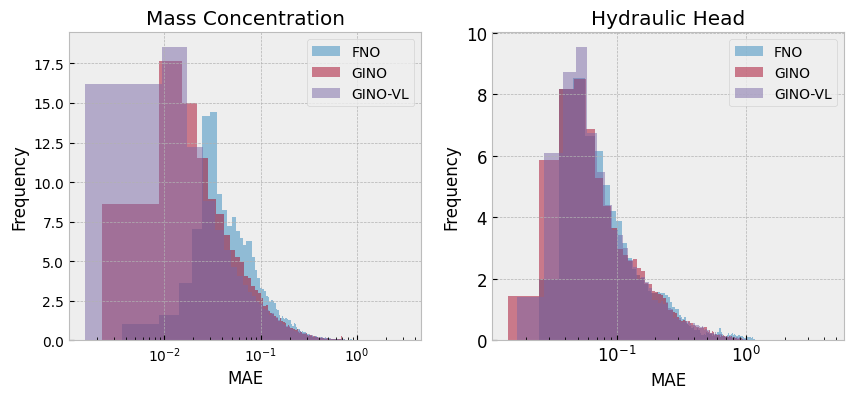

In [30]:
import matplotlib as mpl

mpl.style.use('bmh')

target_cols = ['Mass Concentration', 'Hydraulic Head']

fig, ax = plt.subplots(1, len(target_cols), figsize=(10, 4))

for col_idx, col_name in enumerate(target_cols):

    ax[col_idx].hist(fno_mae[col_idx], bins=400, label='FNO', alpha=0.5, density=True)
    ax[col_idx].hist(gino_mae[col_idx], bins=400, label='GINO', alpha=0.5, density=True)
    ax[col_idx].hist(gino_vl_mae[col_idx], bins=400, label='GINO-VL', alpha=0.5, density=True)
    ax[col_idx].legend()
    ax[col_idx].set_ylabel('Frequency')
    # if col_idx == (len(target_cols)-1):
    ax[col_idx].set_xlabel('MAE')
    ax[col_idx].set_xscale('log')
    ax[col_idx].set_title(f"{col_name}")
    
    
    # ax[col_idx, 1].scatter(obs_var[col_idx], fno_mae[col_idx], s=3, label='FNO', alpha=0.6)
    # ax[col_idx, 1].scatter(obs_var[col_idx], gino_mae[col_idx], s=3, label='GINO', alpha=0.6)
    # ax[col_idx, 1].scatter(obs_var[col_idx], gino_vl_mae[col_idx], s=3, label='GINO-VL', alpha=0.6)
    # ax[col_idx, 1].legend()
    # if col_idx == (len(target_cols)-1):
    #     ax[col_idx, 1].set_xlabel('Temporal Variance')
    # ax[col_idx, 1].set_ylabel('MAE')
    # ax[col_idx, 1].set_xscale('log')
    # ax[col_idx, 1].set_title(f"{col_name}")

plt.xticks(fontsize=12)
_=plt.yticks(fontsize=12)
# fig.savefig('high_res_hist_comparison.png', bbox_inches='tight')

In [31]:
import scipy

In [32]:
(fno_obs == gino_obs).all()

True

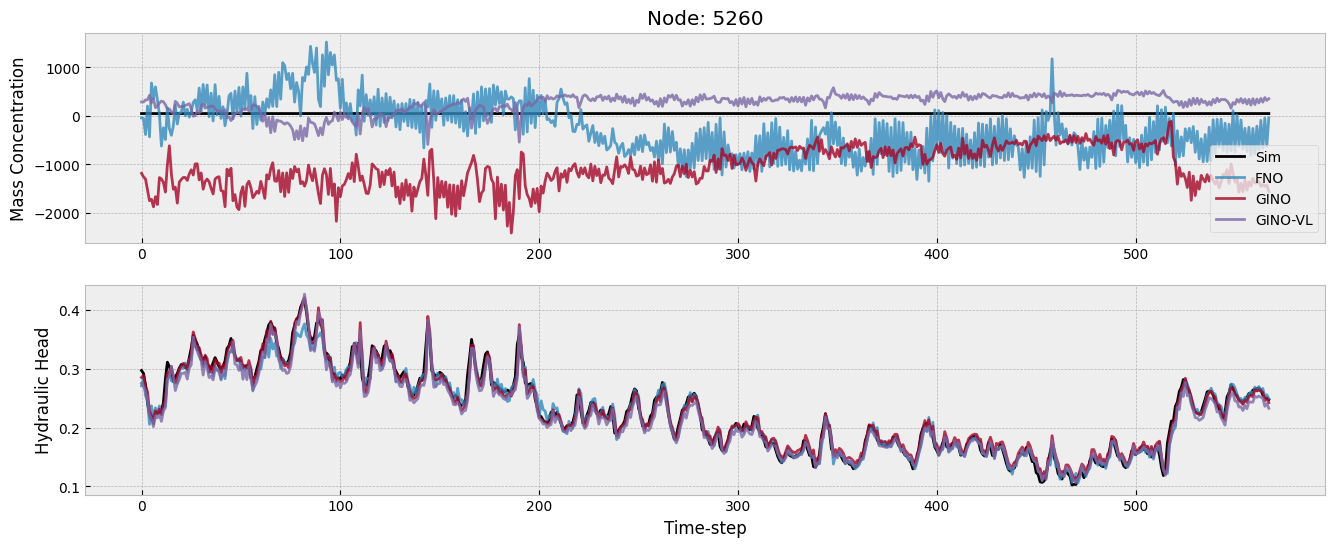

In [33]:
# randn_idx = np.random.choice(np.arange(len(obs)), p=scipy.special.softmax(obs_var[0]))
obs_var = compute_var(fno_obs)
randn_idx = np.argsort(obs_var[0])[int(len(fno_obs)/8*1)]
# randn_idx = 3271

fig, ax = plt.subplots(len(target_cols), 1,  figsize=(16, 6))


for col_idx, col_name in enumerate(target_cols):

    ax[col_idx].plot(fno_obs[randn_idx, :, col_idx], label='Sim', c='black')
    ax[col_idx].plot(fno_preds[randn_idx, :, col_idx], label='FNO',  alpha=0.8)
    ax[col_idx].plot(gino_preds[randn_idx, :, col_idx], label='GINO',  alpha=0.8)
    ax[col_idx].plot(gino_vl_preds[randn_idx, :, col_idx], label='GINO-VL', alpha=0.8)

    if col_idx==0:
        ax[col_idx].legend(loc=1, bbox_to_anchor=(1, 0.5))
        ax[col_idx].set_title(f"Node: {randn_idx+1}")
    else:
        ax[col_idx].set_xlabel('Time-step')
        
    ax[col_idx].set_ylabel(col_name)
    # if col_idx == (len(target_cols)-1):

    # ax[col_idx].set_yscale('log')

# fig.savefig('lineplot.png', bbox_inches='tight')


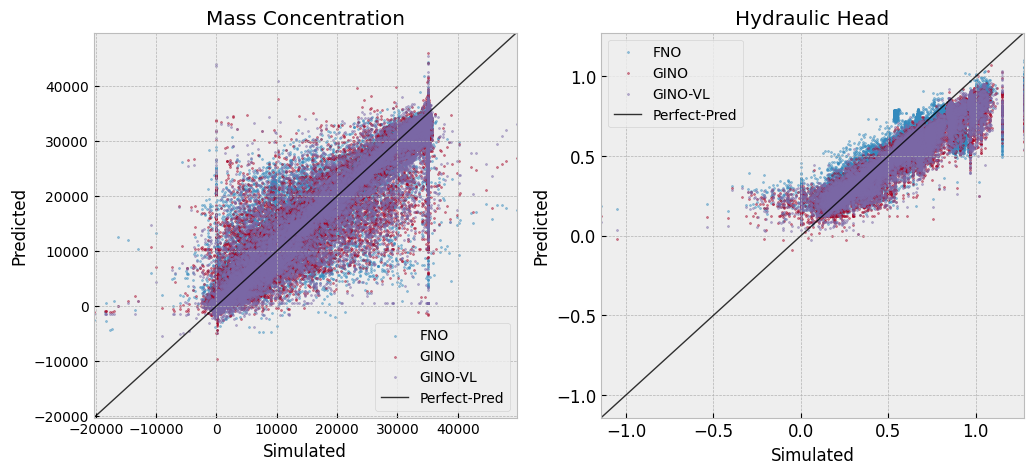

In [36]:
fig, ax = plt.subplots(1, len(target_cols),  figsize=(12, 5))


for col_idx, col_name in enumerate(target_cols):

    low_lim = min(fno_obs[:, -1, col_idx].min(), fno_preds[:, -1, col_idx].min())
    up_lim = max(fno_obs[:, -1, col_idx].max(), fno_preds[:, -1, col_idx].max())
    x = np.linspace(low_lim, up_lim, 100)
    

    ax[col_idx].scatter(fno_obs[:, -1, col_idx].flatten(), fno_preds[:, -1, col_idx].flatten(), s=2, label='FNO', alpha=0.5)
    ax[col_idx].scatter(fno_obs[:, -1, col_idx].flatten(), gino_preds[:, -1, col_idx].flatten(), s=2, label='GINO', alpha=0.5)
    ax[col_idx].scatter(fno_obs[:, -1, col_idx].flatten(), gino_vl_preds[:, -1, col_idx].flatten(), s=2, label='GINO-VL', alpha=0.5)
    ax[col_idx].plot(x, x, label='Perfect-Pred', linewidth=1, c='black', alpha=0.8)


    ax[col_idx].set_xlim(low_lim, up_lim)
    ax[col_idx].set_ylim(low_lim, up_lim)

    ax[col_idx].set_xlabel('Simulated')
    ax[col_idx].set_ylabel('Predicted')
    ax[col_idx].legend()
        
    ax[col_idx].set_title(col_name)

plt.xticks(fontsize=12)
_=plt.yticks(fontsize=12)

# fig.savefig('scatterplot.png', bbox_inches='tight')

In [53]:
import torch
import json
import pandas as pd

In [38]:
model_path_dict = {'gino':'/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO/forcing/training_20260114_110144/checkpoints/latest_checkpoint.pth',
              'fno': '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO/forcing/training_20260116_090922/checkpoints/latest_checkpoint.pth'}

for model, model_path in model_path_dict.items():
    checkpoint = torch.load(model_path, map_location=torch.device('cpu'))
    num_elements_in_state_dict = sum(p.numel() for p in checkpoint['model_state_dict'].values())
    print(model, num_elements_in_state_dict)

gino 33701008
fno 33663298


In [78]:
gino_vl_base_path = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing'
gino_base_path = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/forcing_standard_loss'
fno_base_path = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/FNO_predictions/forcing'

resolution_res_dir = sorted([d for d in os.listdir(gino_base_path) if d.startswith('resolution')])
print(resolution_res_dir)

['resolution_0.2', 'resolution_0.4', 'resolution_0.6', 'resolution_0.8', 'resolution_1.0']


In [83]:
model_path_dict = {
    'FNO': fno_base_path,
    'GINO': gino_base_path,
    'GINO-VL': gino_vl_base_path
}

model_metrics_dict = {}

for model, model_base_path in model_path_dict.items():
    
    metrics_all = []
    
    for res_dir in resolution_res_dir:
        res_path = os.path.join(model_base_path, res_dir)
        latest_run = sorted(os.listdir(res_path))[-1]
        metadata = json.load(open(os.path.join(res_path, latest_run, 'metadata.json'), 'rb'))
        n_points = metadata['dataset_info']['train']['n_points']
    
        metrics = pd.read_csv(os.path.join(res_path, latest_run, 'metrics.csv'))
        metrics = metrics.loc[(metrics.metric_name=='nmae'), ['variable', 'val']].set_index('variable').rename(columns={'val': n_points})
    
        metrics_all.append(metrics)
        
    metrics = pd.concat(metrics_all, axis=1).T

    
    model_metrics_dict[model] = metrics

Text(0.5, 1.0, 'Hydraulic Head')

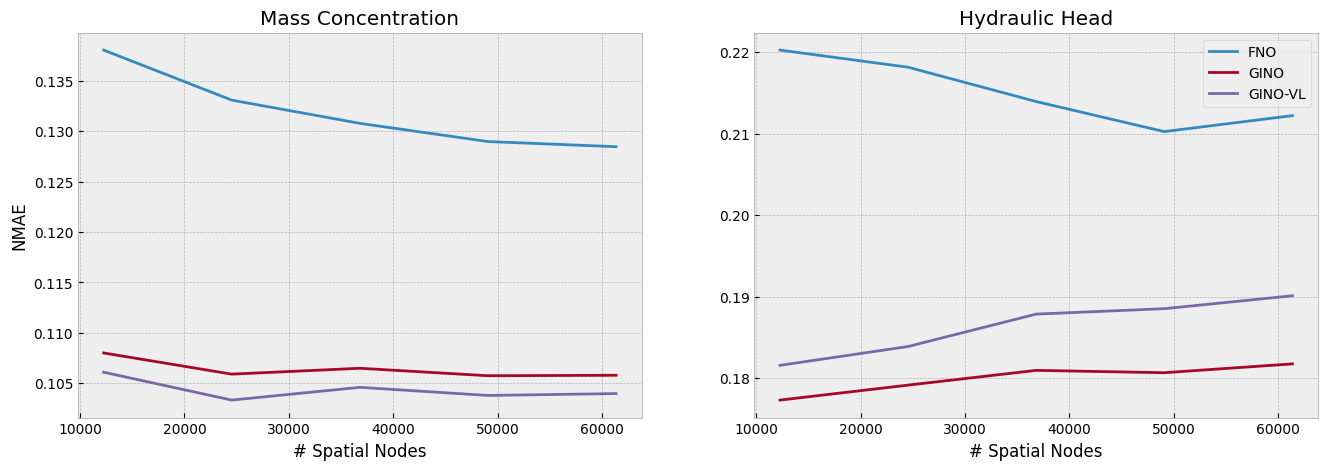

In [96]:
fig, ax =  plt.subplots(1, 2, figsize=(16, 5))

for i, (model, model_metrics) in enumerate(model_metrics_dict.items()):

    ax[0].plot(model_metrics.index, model_metrics['mass_concentration'], label=model)

# ax[0].legend()
ax[0].set_ylabel('NMAE')
ax[0].set_xlabel('# Spatial Nodes')
ax[0].set_title('Mass Concentration')


for i, (model, model_metrics) in enumerate(model_metrics_dict.items()):

    ax[1].plot(model_metrics.index, model_metrics['head'], label=model)

ax[1].legend()
# ax[1].set_ylabel('NMAE')
ax[1].set_xlabel('# Spatial Nodes')
ax[1].set_title('Hydraulic Head')
